## Background

A 3D wedge model with variable heterogeneity might help us forward model spectral responses. 

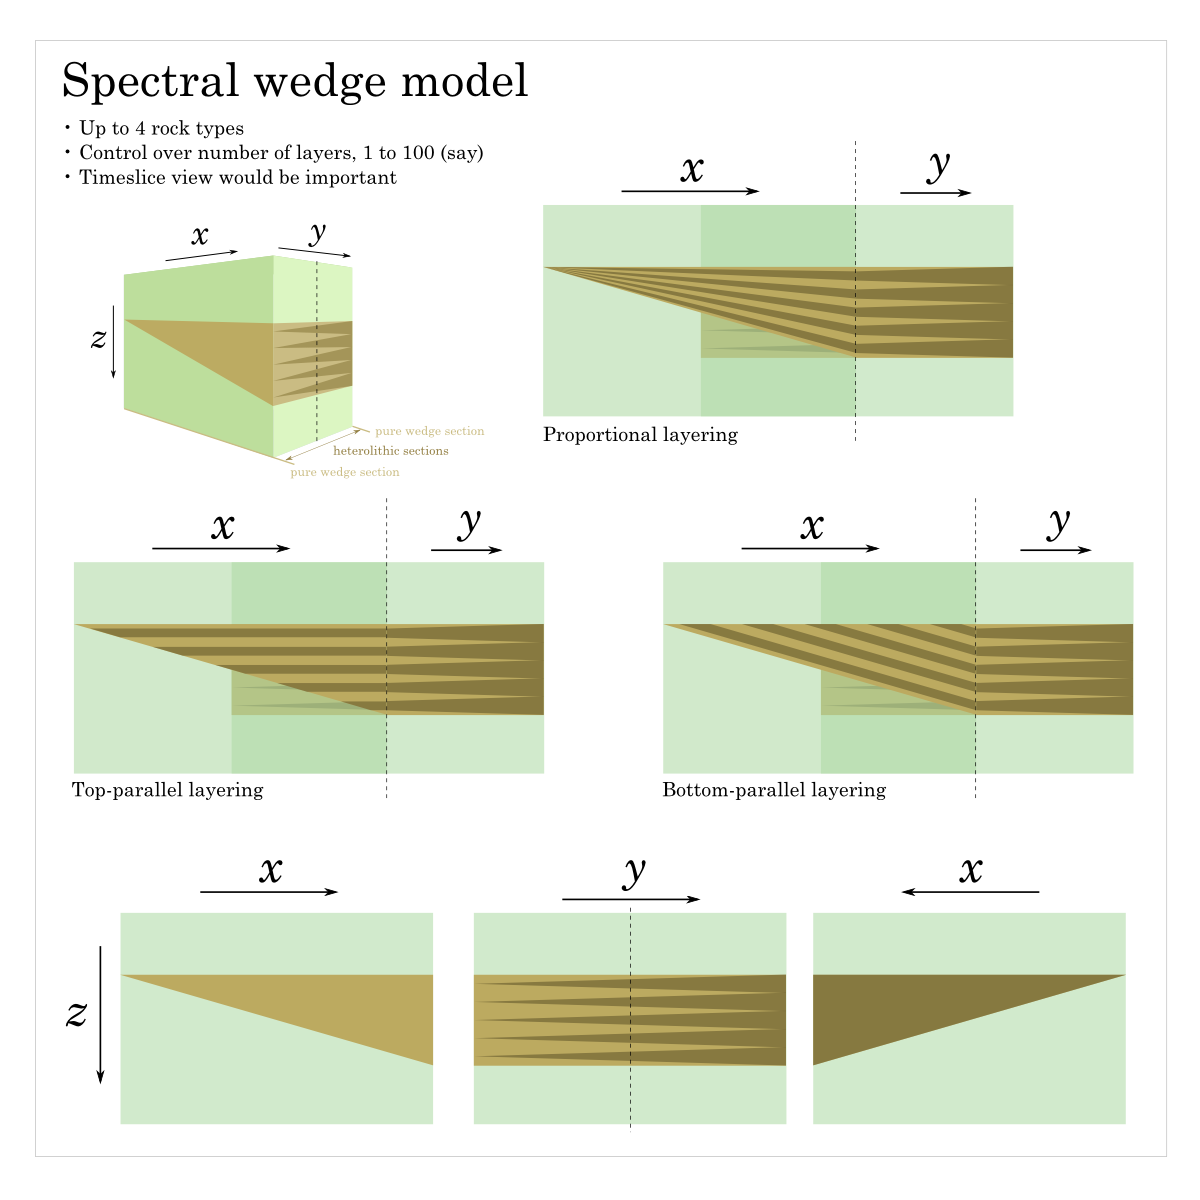

In [1]:
from IPython.core.display import Image 
Image(filename='Spectral_wedge_model_concept.png', width=800) 

The purpose of this notebook is to create a NumPy matrix representing this 3D wedge model, using functions to define 'layers' in the matrix.

Start with the usual set up.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

Set up the model parameters. Warning — it gets slow for numbers over 100. For the wavelet I'm using, we need a decent 'depth' parameter, so if you want to speed it up to test something, change the length and width. 

In [2]:
length = 100.# x range
width = 100. # y range
depth = 240. # z range
subwedges= 3

We will build the wedge layer by layer. For now, we'll use intergers 1, 2, 3, etc, to represent rocks.

Start with a blank slate.

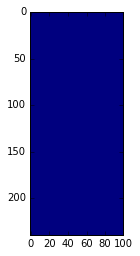

In [3]:
value = 1.
m = np.ones((depth,length))
plt.imshow(m, interpolation='nearest')
plt.show()

Index into the array with *z* = depth, *x* = length, *v* = value (not needed). First a loop to generate the wedge 'contents', then another to put the top on. 

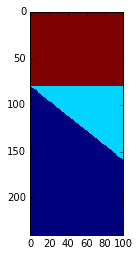

In [4]:
value = 2.
for (z,x),v in np.ndenumerate(m):
    if z < (depth/3)*(1 + x/length):
        m[z,x] = value
        
value = 4.
for (z,x),v in np.ndenumerate(m):
    if z < depth/3:
        m[z,x] = value
     
plt.imshow(m, interpolation='nearest')
plt.show()

## Constant *x* slice

We have a basic wedge, but I want subwedges within the wedge. So let's look at an orthogonal slice. 

First, draw the bottom of the wedge.

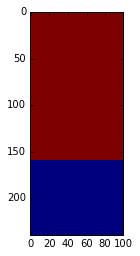

In [5]:
n = np.ones((depth,width))
value = 2.
for (z,y),v in np.ndenumerate(n):
    if z < 2*depth/3:
        n[z,y] = value

plt.imshow(n, interpolation='nearest')
plt.show()

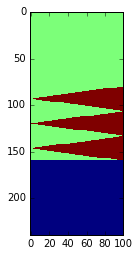

In [6]:
for i in range(subwedges):
    # Draw the bottom of the subwedge and flood with subwedge rock
    value = 3.
    for (z,y),v in np.ndenumerate(n):
        if z < (depth/3)*(2. - (2*i+1)/(2.*subwedges) + y/(2.*subwedges*width)):
            n[z,y] = value
    # Draw the top of the subwedge and flood with wedge rock
    value = 2.
    for (z,y),v in np.ndenumerate(n):
        if z < (depth/3)*(2. - (2*i+1)/(2.*subwedges) - y/(2.*subwedges*width)):
            n[z,y] = value
            
plt.imshow(n, interpolation='nearest')
plt.show()

Put the top in place:

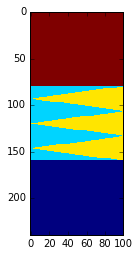

In [7]:
value = 4.
for (z,x),v in np.ndenumerate(n):
    if z < depth/3:
        n[z,x] = value

plt.imshow(n, interpolation='nearest')
plt.show()

<hr />

## Failed experiments

In [44]:
# DOESN'T WORK
def spectral_wedge(depth, length, width, subwedges):

    model = np.empty((depth,length,width,3))
    
    d = depth/3.0

    for x in range(int(length)):
        
        # We need thickness for the current x slice.
        t = d * (x/length)
        
        # Get the thickness of the subwedges.
        sw = t / subwedges
        
        # If the subwedge is less than 1 pixel thick, move on.
        #if sw < 1: continue
        
        # Add the bottom layer of the model.
        model[int(d + t):,x,:,:] = 2
        
        # Add the subwedge background.
        model[int(d):int(d + t),x,:,:] = 1
        
        for y in range(int(width)):
            # model[d+w*sw:d+(w+1)*sw,x,:,:] = subwedge
            top = d + sw/2. - (y/width)*sw/2.
            bot = d + t 
            model[int(top):int(bot), x, y, :] = 3
    
    # Add the top of the model
    model[:int(d),:,:,:] = 4

    return model

In [9]:
def spectral_wedge_int(depth, length, width):
    """
    Makes a spectral wedge.

    """

    colours = {1: np.array([1.,0,0]),
             2: np.array([0,1.,0]),
             3: np.array([0,0,1.]),
             4: np.array([1.,1.,0])
             }

    model = np.empty((depth,length,width,3))
    model[:,:,:,:] = colours[1]

    for xslice in range(int(length)):
        thickness = (depth/3) * (xslice/length)
        
        model[depth/3:(depth/3 + thickness),xslice,:,:] = colours[2]
        
        for (z,y,x),rgb in np.ndenumerate(model[depth/3:(depth/3 + thickness),xslice,:,:]):
            for i in range(subwedges):
                bottom = (depth/3) + (thickness) * (1 - (2*i+1)/(2.*subwedges) + y/(2.*subwedges*width))
                top    = (depth/3) + (thickness) * (1 - (2*i+1)/(2.*subwedges) - y/(2.*subwedges*width))
                
                model[top:bottom,xslice,y,:] = colours[3]

    model[:depth/3,:,:,:] = colours[4]

    return model


In [14]:
def plot_rgb(data):
    plt.figure(figsize=(16,12))
    
    for j in range(3):
        plt.subplot(3,4,j+1)
        plt.title('y = ' + str(int(j*(length/3))))
        plt.imshow(data[:,:,int(j*(length/3)),:])
    plt.subplot(3,4,4)
    plt.title('y = ' + str(int(length-1)))
    plt.imshow(data[:,:,-1,:])
    
    for j in range(3):
        plt.subplot(3,4,5+j)
        plt.title('x = ' + str(int(j*(width/3))))
        plt.imshow(data[:,int(j*(width/3)),:,:])
    plt.subplot(3,4,8)
    plt.title('x = ' + str(int(width-1)))
    plt.imshow(data[:,-1,:,:])
    
    for j in range(3):
        plt.subplot(3,4,9+j)
        plt.title('z = ' + str(1 + int(1 + depth/3 + j*depth/(3*3))))
        plt.imshow(data[1 + int(depth/3 + j*depth/(3*3)),:,:,:])
    plt.subplot(3,4,12)
    plt.title('z = ' + str(int(2*depth/3 - 1)))
    plt.imshow(data[int(2*depth/3 - 1),:,:,:])
    
    plt.show()

<hr /> 

## Plotting routine for later

In [87]:
def plot_slices(data, interpolation='nearest', cmap='Greys', vmin=0., vmax=1.):
    plt.figure(figsize=(16,12))
    
    yaspect = data.shape[1] / data.shape[0]
    xaspect = data.shape[2] / data.shape[0]
    
    for j in range(3):
        plt.subplot(3,4,j+1)
        plt.title('x = ' + str(int(j*(length/3))))
        plt.imshow(data[:,:,int(j*(length/3))], interpolation=interpolation, cmap=cmap, vmax=vmax, vmin=vmin, aspect=xaspect)
    plt.subplot(3,4,4)
    plt.title('x = ' + str(int(length-1)))
    plt.imshow(data[:,:,-1], interpolation=interpolation, cmap=cmap, vmax=vmax, vmin=vmin, aspect=xaspect)
    
    for j in range(3):
        plt.subplot(3,4,5+j)
        plt.title('y = ' + str(int(j*(width/3))))
        plt.imshow(data[:,int(j*(width/3)),:], interpolation=interpolation, cmap=cmap, vmax=vmax, vmin=vmin, aspect=yaspect)
    plt.subplot(3,4,8)
    plt.title('y = ' + str(int(width-1)))
    plt.imshow(data[:,-1,:], interpolation=interpolation, cmap=cmap, vmax=vmax, vmin=vmin, aspect=yaspect)
    
    for j in range(3):
        plt.subplot(3,4,9+j)
        plt.title('z = ' + str(1 + int(1 + depth/3 + j*depth/(3*3))))
        plt.imshow(data[1 + int(depth/3 + j*depth/(3*3)),:,:], interpolation=interpolation, cmap=cmap, vmax=vmax, vmin=vmin)
    plt.subplot(3,4,12)
    plt.title('z = ' + str(int(2*depth/3 - 1)))
    plt.imshow(data[int(2*depth/3 - 1),:,:], interpolation=interpolation, cmap=cmap, vmax=vmax, vmin=vmin)
    
    plt.show()

<hr />

## Full 3D array

In [141]:
length = 100.# x range
width = 100. # y range
depth = 300. # z range
sw = 4

Instead of looping over the entire array each time, we'll build a series of constant *x*-slices, as in the last section. This should parallelize nicely. 

In [133]:
from numba import jit

In [134]:
@jit
def subwedges(depth, length, width, sw):
    
    # Make the basic cube with all 1. This will also be the lowermost layer.
    model = np.ones((depth, length, width), dtype=np.int)

    d = int(depth/3)  # We use this often.
    
    # Visit each y slice in turn. 
    for yslice in range(int(length)):
        
        # Calculate the thickness and make the wedge 'background' with 2s.
        thickness = d * yslice/length
        t = int(d + thickness)
        
        model[d:t, yslice, :] = 2

        if conformance == 'both'
            # For each column in this slice...
            for (_, y), _ in np.ndenumerate(model[d:t, yslice, :]):

                # ...and each subwedge in the collection...
                for i in range(sw):

                    # Calculate the top and base of the subwedge.
                    bottom = d + thickness * (1 - (2*i+1) / (2*sw) + y / (2*sw*width))
                    top    = d + thickness * (1 - (2*i+1) / (2*sw) - y / (2*sw*width))
                    
        # Set the subwedge value to 3.
        model[top:bottom, yslice, y] = 3

    # Now fill the top of the model in with 4s.
    model[:d, :, :] = 4
    
    return model

In [135]:
%timeit subwedges(depth, length, width, sw)

1 loops, best of 3: 1.01 s per loop


In [146]:
mod = subwedges(depth, length, width, sw)

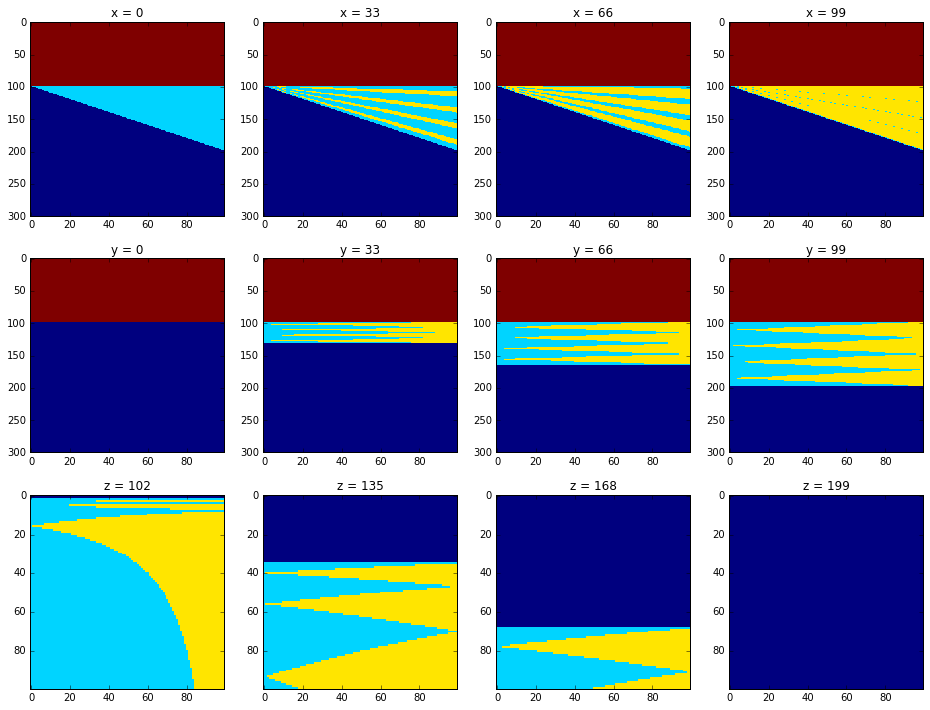

In [147]:
plot_slices(mod, interpolation='nearest', cmap='jet', vmax=4, vmin=1)

Now we have a 3D model. We'd like to look at it. Without getting into Mayavi, the easiest thing to do is to just look at some x, y, and z slices. Let's make a function to do this, since we'll want it again for the synthetic. 

## Other subwedge geometries

First, top-conforming. This should be relatively easy: just draw the wedge and subwedges the same everywhere, then 'draw' the bottom layer over everything. 

In [153]:
@jit
def topmod(depth, length, width, sw):
    topmod = 2 * np.ones((depth,length,width), dtype=np.int)

    for xslice in range(int(length)):
        thickness = (depth/3)*(1 + xslice/length)

        for (z,y),v in np.ndenumerate(topmod[int(depth/3):int(thickness),xslice,:]):
            for i in range(sw):
                bottom = (depth/3) + (depth/3) *(1 - (2*i+1)/(2.*sw) + y/(2.*sw*width))
                top    = (depth/3) + (depth/3) *(1 - (2*i+1)/(2.*sw) - y/(2.*sw*width))

                topmod[int(top):int(bottom),xslice,y] = 3

        topmod[int(thickness):,xslice,:] = 1               

    # Draw the top
    topmod[:int(depth/3),:,:] = 4
    
    return topmod

In [150]:
top = topmod(depth, length, width, sw)

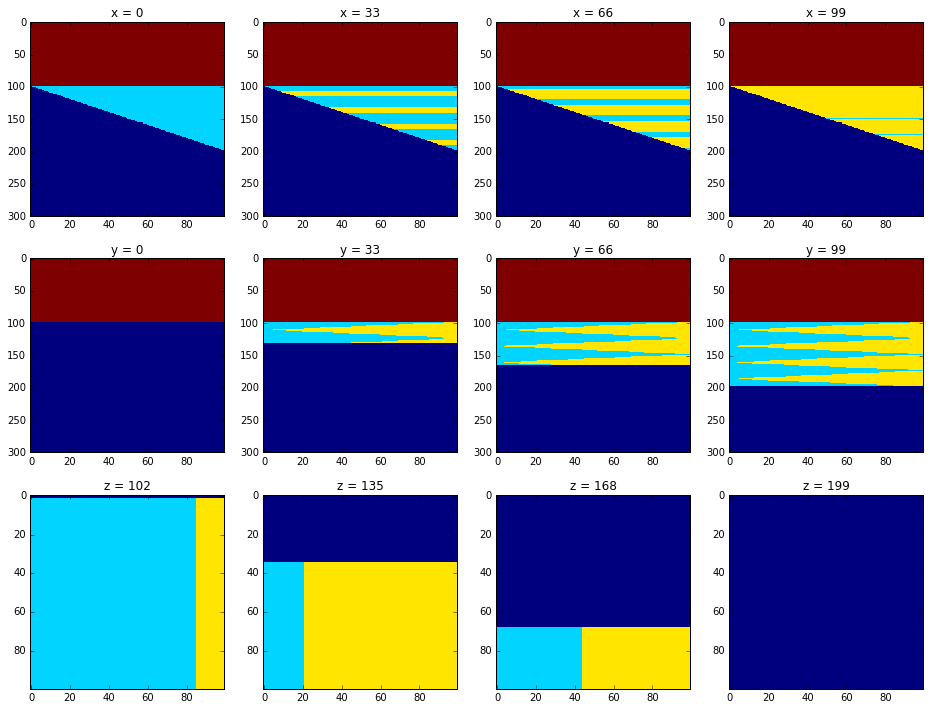

In [151]:
plot_slices(t, interpolation='nearest', cmap='jet', vmax=4, vmin=1)

Now we'll try bottom-conforming.

In [166]:
@jit
def botmod(depth, length, width, sw):

    model = np.ones((depth,length,width), dtype=np.int)

    for xslice in range(int(length)):
        thickness = (depth/3) * (xslice/length)
        antithick = (depth/3) * ((length - xslice)/length)

        model[int(depth/3):int(depth/3 + thickness),xslice,:] = 2

        for (_,y), _ in np.ndenumerate(model[int(depth/3):int(depth/3 + thickness), xslice, :]):
            for i in range(sw):
                bottom = (depth/3) + (depth/3)*(1 - (2*i+1)/(2.*sw) + y/(2.*sw*width)) - antithick
                top    = (depth/3) + (depth/3)*(1 - (2*i+1)/(2.*sw) - y/(2.*sw*width)) - antithick

                model[int(top):int(bottom),xslice,y] = 3

    # Draw the top
    model[:int(depth/3),:,:] = 4

    return model

In [167]:
bot = botmod(depth, length, width, sw)

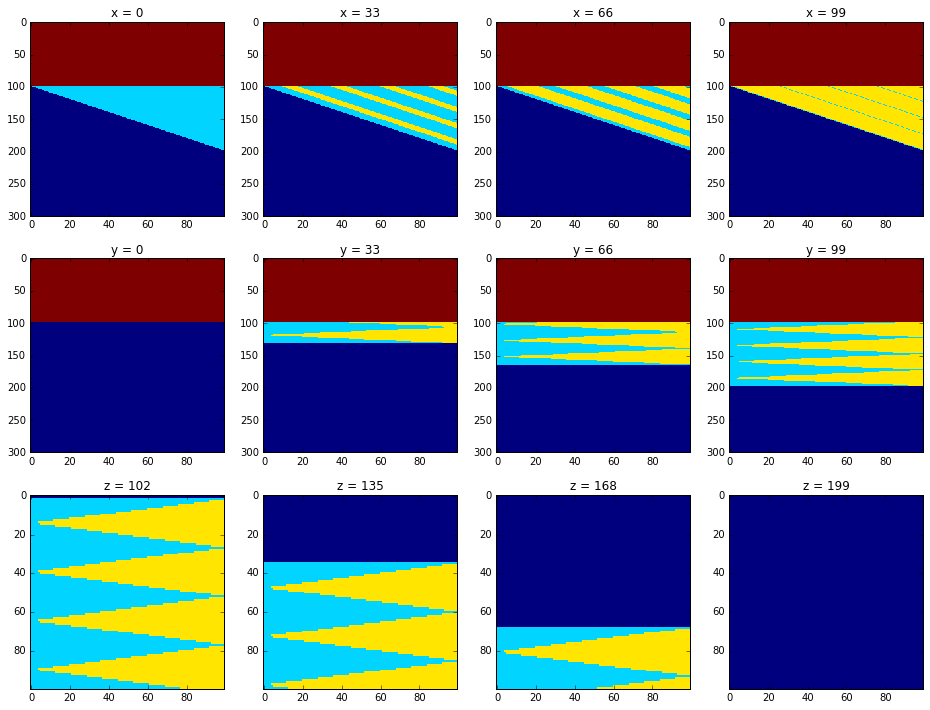

In [169]:
plot_slices(bot, interpolation='nearest', cmap='jet', vmax=4, vmin=1)

## Making a synthetic

Now we can make this model (with its values like 1, 2, 3, etc.) into a model with 'real' rocks. This array of acoustic impedances has the deepest or oldest rock at position 0 and the youngest at position 3. 

In [170]:
rocks = [(2800, 2850), (2700, 2750), (2600, 2550), (2400,2450)]

def make_ai(rocks):
    rx = np.array(rocks)
    return rx[:,0] * rx[:,1] / 10e6

ai = make_ai(rocks)
print(ai)

[ 0.798   0.7425  0.663   0.588 ]


In [171]:
def assign_rocks(model, ai):
    code = 1
    for rock in ai:
        model[model==code] = rock
        code += 1
    return model

earth = assign_rocks(model, ai)

Now we can compute reflection coefficients

In [172]:
def make_rc(earth):
    upper = earth[:-1][:][:]
    lower = earth[1:][:][:]
    
    return (lower - upper) / (lower + upper)

rc = make_rc(earth)

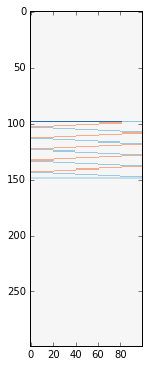

In [228]:
maxrc = np.amax(abs(rc))
plt.figure(figsize=(6,6))
plt.imshow(rc[:,int(length/2),:], interpolation='nearest', cmap='RdBu', vmax=maxrc, vmin=-maxrc)
plt.show()

And we need a wavelet:

In [216]:
from scipy.signal import ricker
from scipy.signal import fftconvolve

In [201]:
depth

300.0

In [229]:
n_samples = depth
n_traces = length
n_xlines = width

def make_synth(rc, f=20):
    
    points = 80
    synth = np.zeros((n_samples-1, n_traces, n_xlines))
    wavelet = ricker(points, 1000/(4*f))
    wavelet = wavelet / max(wavelet)
    for i in range(int(n_traces)):
        for j in range(int(n_xlines)):
            synth[:,i,j] = np.convolve(rc[:,i,j], wavelet, mode='same')
    synth = synth[int(np.ceil(len(wavelet))/2):int(-np.ceil(len(wavelet))/2),:,:]
    return synth

def forward_model(model, rocks, freq=20):
    """
    Meta function to do everything from scratch
    """
    ai = make_ai(rocks)
    earth = assign_rocks(model, ai)    
    rc = make_rc(earth)
    return make_synth(rc,freq)

Generate the 3D synthetic seismic volume.

In [230]:
synthmod = forward_model(mod, rocks)

/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


And plot, using the same routine as before. 

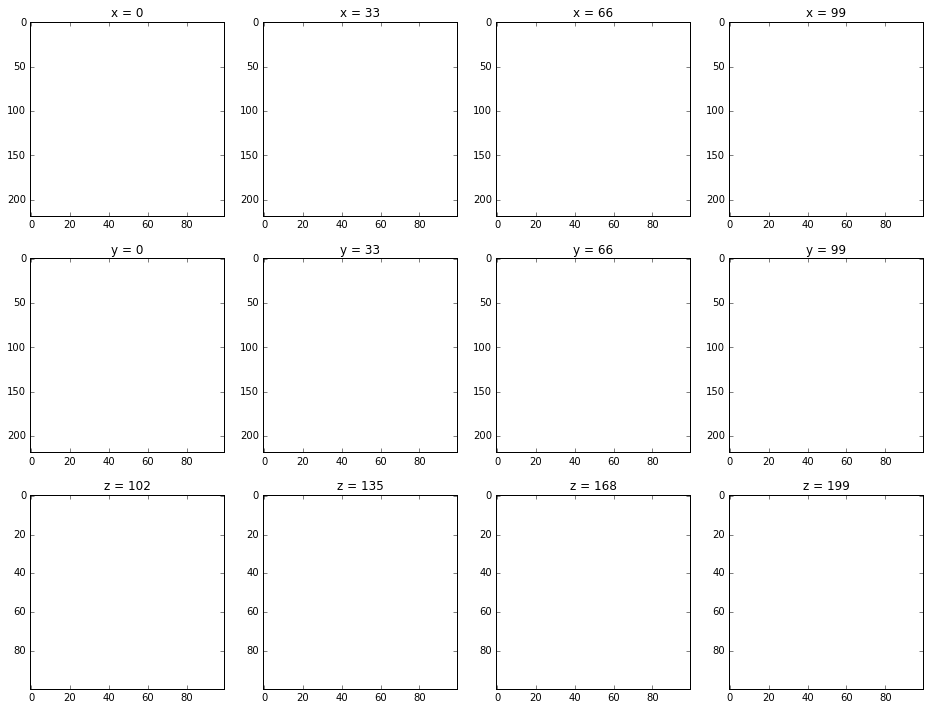

In [231]:
maxrc = np.amax(abs(synthmod))
plot_slices(synthmod, interpolation='bilinear', vmax=maxrc, vmin=-maxrc)

/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


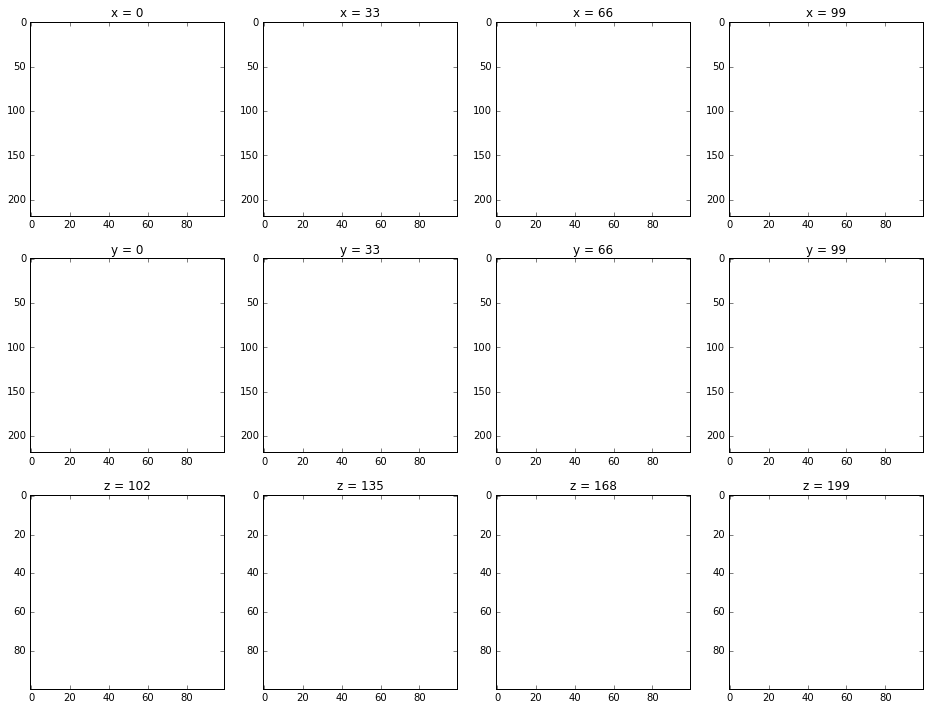

In [232]:
synthtop = forward_model(top, rocks)
plot_slices(synthtop, interpolation='bilinear', vmax=maxrc, vmin=-maxrc)

In [233]:
print(botmod.shape)
print(botmod.size)
print(np.amin(botmod))
print(np.amax(botmod))

AttributeError: 'CPUOverloaded' object has no attribute 'shape'

In [234]:
synthbot = forward_model(botmod, rocks, 20)
plot_slices(synthbot, interpolation='bilinear', vmax=maxrc, vmin=-maxrc)

TypeError: 'CPUOverloaded' object does not support item assignment

## Making an RGB blend

Now we'll add another dimension by computing three cubes — each at a different central frequency. The nice thing about having such a 'three-channel' array is that <code>imshow</code> can display it directly as an RGB image.

In [235]:
freqs = [25,20,15]
synthrgb = np.empty((depth-1,length,width,3))

for f in freqs:
    synthrgb[:,:,:,freqs.index(f)] = forward_model(mod, rocks, f)

/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: could not broadcast input array from shape (219,100,100) into shape (299,100,100)

We'll do some scaling — scale each channel independently.

In [35]:
from scipy.signal import hilbert

envelope = abs(hilbert(synthrgb))

for i in range(3):
    envelope[:,:,:,i]= envelope[:,:,:,i]/np.amax(envelope[:,:,:,i])

extreme = np.amax(abs(envelope))

In [39]:
import json

rgb = envelope[...,20,:].T
r = envelope[:,:,20,0].T
g = envelope[...,20,1].T
b = envelope[...,20,2].T

with open('/Users/matt/seismic_2d_r.json', 'w') as outfile:
    json.dump(r.tolist(), outfile)
    
with open('/Users/matt/seismic_2d_g.json', 'w') as outfile:
    json.dump(g.tolist(), outfile)
    
with open('/Users/matt/seismic_2d_b.json', 'w') as outfile:
    json.dump(b.tolist(), outfile)
    
with open('/Users/matt/seismic_2d_rgb.json', 'w') as outfile:
    json.dump(rgb.tolist(), outfile)
    
with open('/Users/matt/seismic_3x2d.json', 'w') as outfile:
    json.dump([r.tolist(), g.tolist(), b.tolist()], outfile)

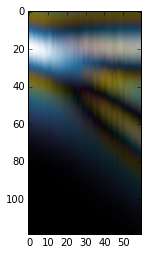

In [36]:
plt.imshow(envelope[...,20,:])

In [65]:
envelope.shape

(119, 60, 60, 3)

By some miracle, the plotting function works without modification...

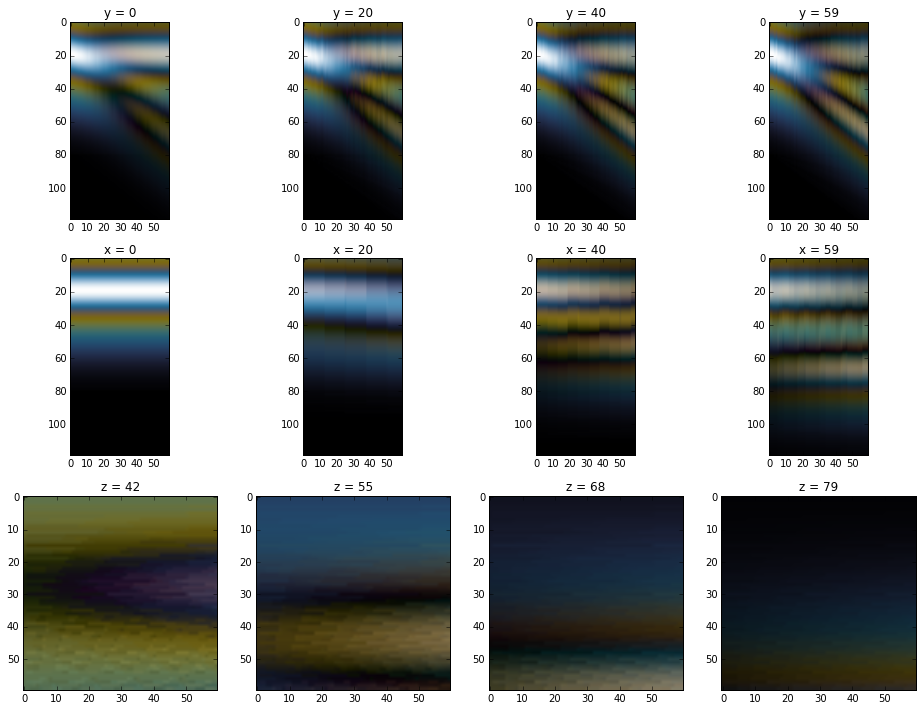

In [57]:
plot_slices(envelope, interpolation='bilinear', vmax=extreme, vmin=-extreme)

Let's turn all that into functions:

In [58]:
from scipy.signal import hilbert

def make_triplet(model, rocks, freqs=(60,30,15)):
    triplet = np.empty((model.shape[0]-2, model.shape[1], model.shape[2], 3))
    for f in freqs:
        triplet[:,:,:,freqs.index(f)] = forward_model(model, rocks, f)
    return triplet

def scaled_rgb(triplet):
    envelope = abs(hilbert(triplet))
    for i in range(3):
        envelope[:,:,:,i]= envelope[:,:,:,i]/np.amax(envelope[:,:,:,i])
    return envelope

In [59]:
top_rgb = scaled_rgb(make_triplet(topmod, rocks, freqs=(25, 20, 15)))
plot_slices(top_rgb, interpolation='bilinear')

/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: could not broadcast input array from shape (120) into shape (239)

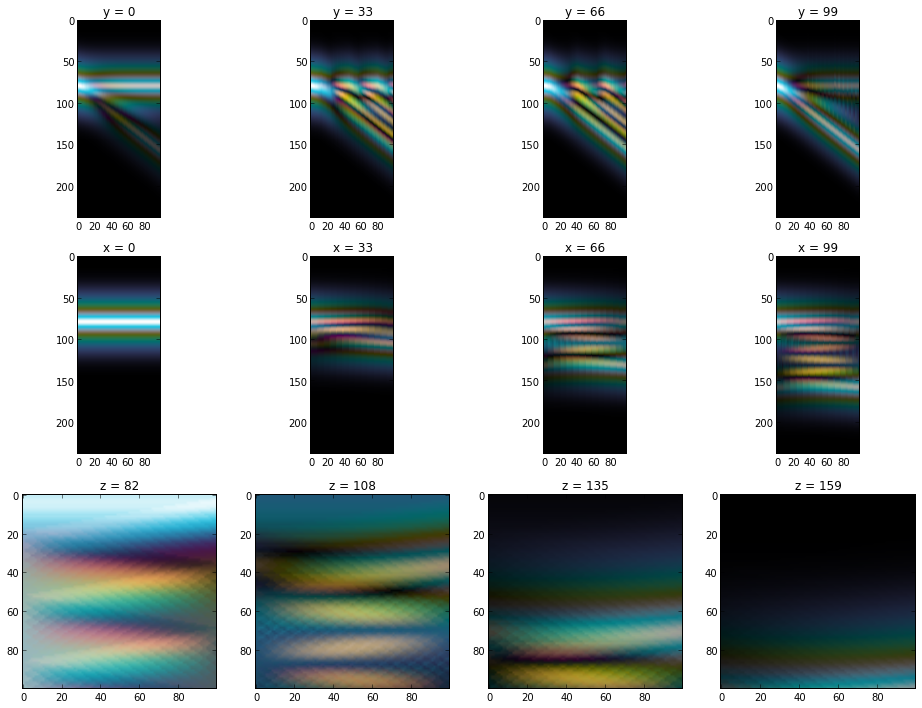

In [32]:
bot_rgb = scaled_rgb(make_triplet(botmod, rocks, freqs=(40,22,15)))
plot_slices(bot_rgb, interpolation='bilinear')

## Real decomposition

This three-wavelet thing is hacky. Let's actually compute the spectrum from a single synthetic, and build the RGB plot from the Fourier coefficients (or wavelet scales, or whatever). 

In [96]:
synth = forward_model(botmod, rocks, 15)

In [97]:
from agilegeo.attribute.spectraldecomp import spectraldecomp

In [98]:
from scipy.ndimage.interpolation import zoom
from scipy.interpolate import interp1d

In [109]:
spec = np.empty((depth, length, width, 3))

for xslice in range(int(length)):
    spectrum = spectraldecomp(synth[:,xslice,:], window_length=8)
    
    spectrum /= np.amax(spectrum, axis=0)
    
    interpolated = interp1d(np.linspace(0,240,spectrum.shape[0]), spectrum, axis=0, kind='linear')
    spec[:,xslice,:,:] = interpolated(np.linspace(0,240,spec.shape[0]))

In [110]:
spec.shape

(240, 100, 100, 3)

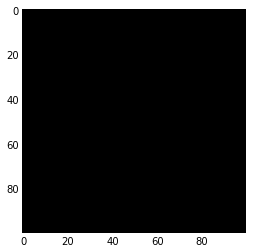

In [111]:
plt.imshow(spec[120,:,:,:])
plt.show()

## Bugs, improvements

I don't want to get too carried away because this is all destined for [modelr.io](https://www.modelr.io/), but here are the most obvious improvements to make. 

- It's slow. It should be parallel. This would be a requirement for modelr to run anything but very small models. We should pre-compute some default sizes, perhaps even dozens or hundreds of them. 
- I am not getting the 'last' wedge, which should be completely yellow in these plots. - The so-called frequency in this code is not really frequency, it's just a scale factor. The code would be more useful in real time units.
- It would be better to generate a volume at one frequency, then filter it back for the spectral decomposition. The current method gives too much bandwidth. 
- Maybe this is a good time to play with spectral noise. [Here's a promising example.](http://stuartowen.com/home/2012/06/09/simulating-noise-in-python/#!/single_blog)